In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
wh_gdgi = pd.read_csv('wh_gd_gi_final.csv')
wh_ef = pd.read_csv('wh_ef_final.csv')
wh_popden = pd.read_csv('wh_popden_final.csv')

wh2015 = wh_gdgi['Happiness Score'].to_numpy()
gd2015 = wh_gdgi['GD 2015'].to_numpy()
gi2015 = wh_gdgi['GI 2015'].to_numpy()

wh2017 = wh_popden['Happiness Score'].to_numpy()
popden2017 = wh_popden['Population Density'].to_numpy()

wh2019 = wh_ef['Happiness Score'].to_numpy()
ef2019 = wh_ef['Economic Freedom Score'].to_numpy()

In [3]:
def spearman_r(x, y):
    # Compute correlation matrix
    r, p = stats.spearmanr(x, y)

    # Return entry [0,1]
    return r

In [4]:
def leastsquares(x,y):
    # Compute slope and intercept
    slope, intercept = np.polyfit(x, y, 1)
    # Print slope and intercept
    print("Slope:", slope)
    print("Intercept:", intercept)

In [5]:
def corr_p_value(x, y, label, boolean='greater', n=10000):
    """Simulates the hypothesis that x and y are totally independent of each other 
    by permuting the x values but leaving the y values fixed"""
    # Compute observed correlation
    corr_obs = spearman_r(x, y)

    # Initialize permutation replicates
    perm_replicates = np.empty(n)

    # Draw replicates
    for i in range(n):
        # Permute x measurments
        permuted = np.random.permutation(x)

        # Compute Pearson correlation
        perm_replicates[i] = spearman_r(permuted, y)

    # Compute p-value
    if boolean == 'less':
        p = np.sum(perm_replicates <= corr_obs) / len(perm_replicates)
    else:
       p = np.sum(perm_replicates >= corr_obs) / len(perm_replicates) 
    
    print('p-val =', p)
    
    # Plot sample correlation coefficients 
    plt.hist(perm_replicates, bins=20)
    plt.xlabel(label + ' Correlation Coefficients')
    plt.ylabel('# of corr_cof')
    plt.title('Distribution of Pearson correlation coefficients')
    plt.axvline(corr_obs, color='r', linestyle='--')


## World Happiness / Gender Development  

##### H<sub>0</sub> : There is NO correlation between World Happiness and Gender Development
##### H<sub>a</sub> : There IS a correlation between World Happiness and Gender Development

Correlation Coefficient: 0.5519161757008172
Slope: 8.965282305574137
Intercept: -2.9510992050977487


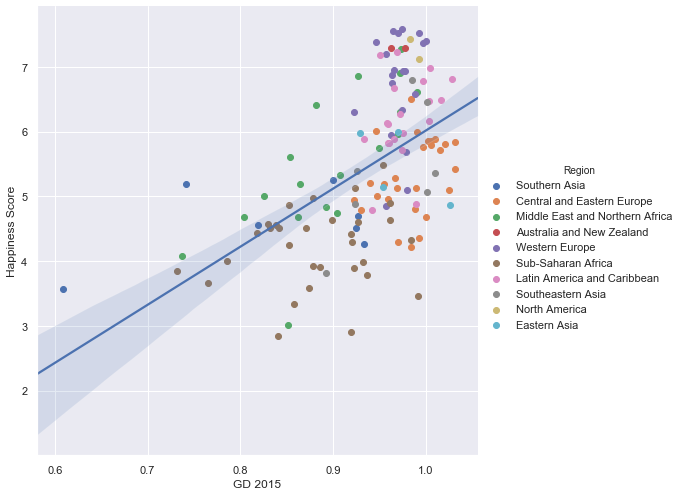

In [6]:
sns.FacetGrid(wh_gdgi, hue="Region", height=7).map(plt.scatter, "GD 2015","Happiness Score").add_legend()
sns.regplot(x="GD 2015", y="Happiness Score", data=wh_gdgi, scatter=False)

print('Correlation Coefficient:', spearman_r(gd2015,wh2015))

leastsquares(gd2015,wh2015)

#### Hypothesis Test on Pearson correlation

p-val = 0.0


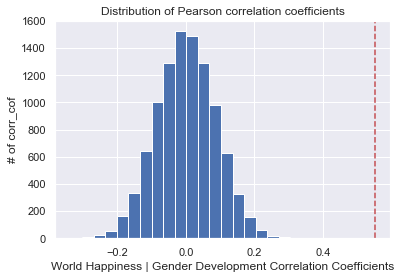

In [7]:
corr_p_value(gd2015, wh2015, 'World Happiness | Gender Development')

## World Happiness / Gender Inequality

#### H<sub>0</sub> : There is NO correlation between World Happiness and Gender Inequality   
#### H<sub>a</sub> : There IS a correlation between World Happiness and Gender Inequality

Correlation Coefficient: -0.7057587917881929
Slope: -4.126217054142486
Intercept: 6.878637957715895


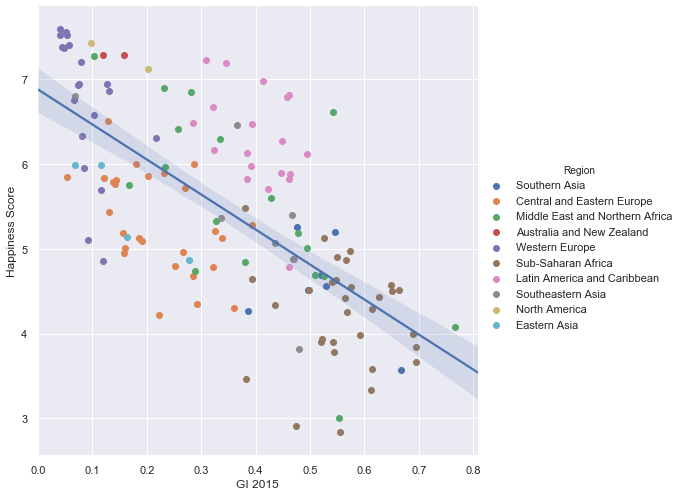

In [8]:
sns.FacetGrid(wh_gdgi, hue="Region", height=7).map(plt.scatter, "GI 2015", "Happiness Score").add_legend()
sns.regplot(x="GI 2015", y="Happiness Score", data=wh_gdgi, scatter=False)

print('Correlation Coefficient:', spearman_r(gi2015,wh2015))
leastsquares(gi2015, wh2015)

#### Hypothesis Test on Pearson correlation

p-val = 0.0


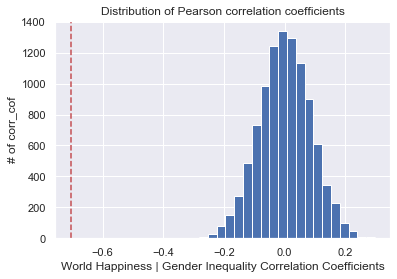

In [9]:
corr_p_value(gi2015, wh2015, 'World Happiness | Gender Inequality', boolean='less')

## World Happiness / Economic Freedom

#### H<sub>0</sub> : There is NO correlation between World Happiness and Economic Freedom   
#### H<sub>a</sub> : There IS a correlation between World Happiness and Economic Freedom

Correlation Coefficient: 0.6915856661430612
Slope: 0.07012271943423865
Intercept: 1.0876054568108526


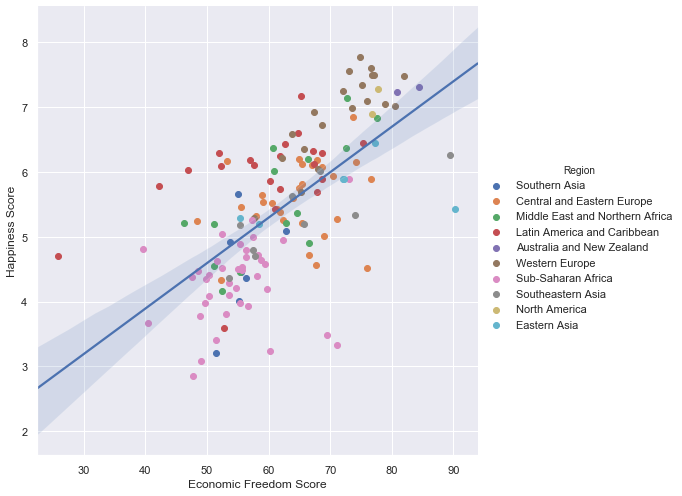

In [10]:
sns.FacetGrid(wh_ef, hue="Region", height=7).map(plt.scatter, "Economic Freedom Score", "Happiness Score").add_legend()
sns.regplot(x="Economic Freedom Score", y="Happiness Score", data=wh_ef, scatter=False)

print('Correlation Coefficient:', spearman_r(ef2019,wh2019))

leastsquares(ef2019,wh2019)

#### Hypothesis Test on Pearson correlation

p-val = 0.0


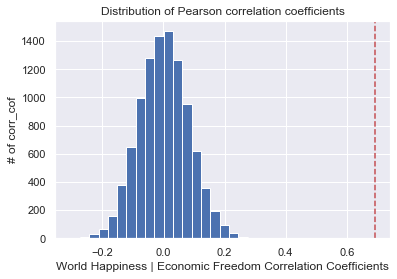

In [11]:
corr_p_value(ef2019, wh2019, 'World Happiness | Economic Freedom')

## Markdown World Happiness / Population Density

#### H<sub>0</sub> : There is NO correlation between World Happiness and Population Density  
#### H<sub>a</sub> : There IS a correlation between World Happiness and Population Density

Correlation Coefficient: 0.08407183750306862
Slope: 0.00010946421337597895
Intercept: 5.325265263745695


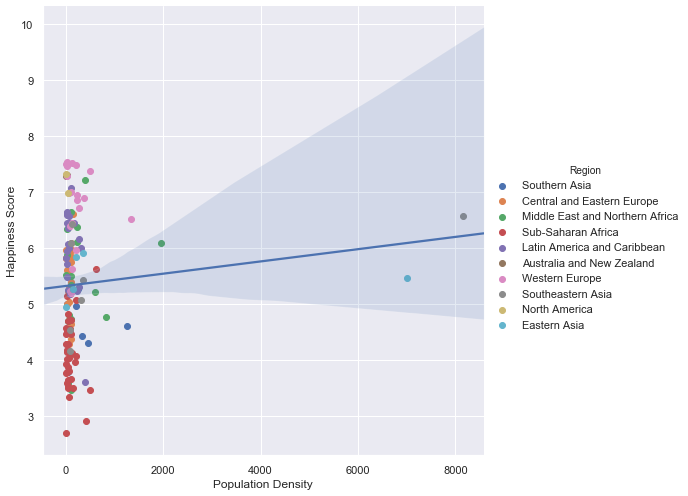

In [12]:
sns.FacetGrid(wh_popden, hue="Region", height=7).map(plt.scatter, "Population Density", "Happiness Score").add_legend()
sns.regplot(x="Population Density", y="Happiness Score", data=wh_popden, scatter=False)

print('Correlation Coefficient:', spearman_r(popden2017, wh2017))

leastsquares(popden2017,wh2017)

#### Hypothesis Test on Pearson correlation

p-val = 0.1575


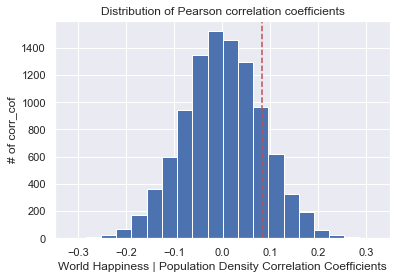

In [13]:
corr_p_value(popden2017, wh2017, 'World Happiness | Population Density')